<a href="https://colab.research.google.com/github/azeyneloglu/RAPS/blob/master/Mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import keras

%matplotlib inline

Using TensorFlow backend.


In [6]:

#Get mnist Data
import tensorflow as tf
data = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#Split the data
X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

In [8]:
#Each example  has dimensions 28*28
example = X_train[0]
example.shape

(28, 28)

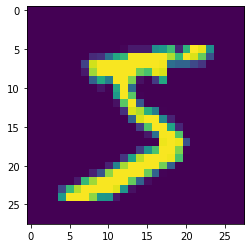

In [0]:
#View data as image

import matplotlib.pyplot as plt

plt.imshow(example)

In [0]:

def CNN_model(input_shape = (28,28,1)):
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)
    
    #First Conv Layer with 5*5 16 filters
    X = Conv2D(16,(5,5),strides=(1,1),padding='valid',name='conv0')(X_input)   
    #X = BatchNormalization(axis=3,name='bn0')(X)
    X = Activation ('relu')(X)
    
    #MAXPOOL
    
    X = MaxPooling2D((2,2),strides=(2,2),name='max_pool0')(X)    
    
    #Second Convlayer
    
    X = Conv2D(32,(3,3),strides=(1,1),padding='valid',name='conv1')(X)
    #X = BatchNormalization(axis=3,name='bn1')(X)
    X = Activation('relu')(X)
    #MAXPOOL
    
    X = MaxPooling2D((2,2),strides=(2,2),name='max_pool1')(X)   
    
    
    #Flatten X to prepare it for final fully connected layer
    
    X = Flatten()(X)
    
    X = Dense(10,activation='softmax', name='fc') (X)
    
    model = Model(inputs = X_input, outputs = X, name='MinstCNNModel')
    
    return model
    
    

In [0]:
#Create the Model

model = CNN_model(input_shape=(28,28,1))

In [0]:


model.compile(optimizer="adam",loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])

In [0]:

#Prepare data to feed to keras model
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

#Normalize the inputs
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

classes = 10
y_train = keras.utils.to_categorical(y_train, classes)
y_test = keras.utils.to_categorical(y_test, classes)

history=model.fit(x = X_train, y = y_train, epochs = 20, batch_size = 32)

#We have 0.9983 training accuracy after 20 epochs

Epoch 1/20
60000/60000 [==============================] - 29s 486us/step - loss: 0.1880 - accuracy: 0.9438
Epoch 2/20
60000/60000 [==============================] - 29s 484us/step - loss: 0.0587 - accuracy: 0.9822
Epoch 3/20
60000/60000 [==============================] - 29s 486us/step - loss: 0.0448 - accuracy: 0.9862
Epoch 4/20
60000/60000 [==============================] - 30s 492us/step - loss: 0.0357 - accuracy: 0.9888
Epoch 5/20
60000/60000 [==============================] - 29s 485us/step - loss: 0.0302 - accuracy: 0.9904
Epoch 6/20
60000/60000 [==============================] - 29s 486us/step - loss: 0.0250 - accuracy: 0.9920
Epoch 7/20
60000/60000 [==============================] - 29s 485us/step - loss: 0.0211 - accuracy: 0.9931
Epoch 8/20
60000/60000 [==============================] - 29s 485us/step - loss: 0.0186 - accuracy: 0.9937
Epoch 9/20
60000/60000 [==============================] - 29s 483us/step - loss: 0.0156 - accuracy: 0.9948
Epoch 10/20
60000/60000 [============

In [0]:
#Test set accuracy is 0.9901 across 10000 test images

preds = model.evaluate(x= X_test, y=y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))


10000/10000 [==============================] - 2s 170us/step

Loss = 0.05002926743291228
Test Accuracy = 0.9901000261306763


In [0]:
#Experimenting with dropout model to increase test accuracy

def CNN_with_DO(input_shape = (28,28,1),classes = 10):

# Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)
    
    #First Conv Layer with 5*5 16 filters
    X = Conv2D(16,(5,5),strides=(1,1),padding='valid',name='conv0')(X_input)   #24*24*16
    #X = BatchNormalization(axis=3,name='bn0')(X)
    X = Activation ('relu')(X)
    
    #MAXPOOL
    
    X = MaxPooling2D((2,2),strides=(2,2),name='max_pool0')(X)     #10*10*32
    
    #Second Convlayer
    
    X = Conv2D(32,(3,3),strides=(1,1),padding='valid',name='conv1')(X)
    #X = BatchNormalization(axis=3,name='bn1')(X)
    X = Activation('relu')(X)
    #MAXPOOL
    
    X = MaxPooling2D((2,2),strides=(2,2),name='max_pool1')(X)   #5*5*32

    #X = Dropout(0.25)(X)
    
    
    #Flatten X to prepare it for final fully connected layer
    
    X = Flatten()(X)
    X = Dropout(0.5)(X) #Dropout is used in final layer
    X = Dense(10,activation='softmax', name='fc') (X)
    
    
    model = Model(inputs = X_input, outputs = X, name='MinstCNNModel')
    
    return model
    

In [0]:
model_do = CNN_with_DO(input_shape = (28,28,1))

In [0]:

model_do.compile(optimizer="adam",loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])


In [29]:
X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

classes = 10
y_train = keras.utils.to_categorical(y_train, classes)
y_test = keras.utils.to_categorical(y_test, classes)

model_do.fit(x = X_train, y = y_train, epochs = 20, batch_size = 32)

Epoch 1/20
60000/60000 [==============================] - 28s 471us/step - loss: 0.2493 - accuracy: 0.9227
Epoch 2/20
60000/60000 [==============================] - 28s 468us/step - loss: 0.0941 - accuracy: 0.9718
Epoch 3/20
60000/60000 [==============================] - 28s 465us/step - loss: 0.0746 - accuracy: 0.9770
Epoch 4/20
60000/60000 [==============================] - 28s 463us/step - loss: 0.0655 - accuracy: 0.9799
Epoch 5/20
60000/60000 [==============================] - 28s 465us/step - loss: 0.0580 - accuracy: 0.9820
Epoch 6/20
60000/60000 [==============================] - 28s 470us/step - loss: 0.0551 - accuracy: 0.9827
Epoch 7/20
60000/60000 [==============================] - 28s 470us/step - loss: 0.0501 - accuracy: 0.9840
Epoch 8/20
60000/60000 [==============================] - 28s 470us/step - loss: 0.0482 - accuracy: 0.9846
Epoch 9/20
60000/60000 [==============================] - 29s 486us/step - loss: 0.0465 - accuracy: 0.9849
Epoch 10/20
60000/60000 [============

In [31]:
# Adding dropout to final layer increased test set accuracy by 0.0018

preds_do = model_do.evaluate(x= X_test, y=y_test)

print()
print ("Loss = " + str(preds_do[0]))
print ("Test Accuracy = " + str(preds_do[1]))

10000/10000 [==============================] - 2s 161us/step

Loss = 0.02513978519856173
Test Accuracy = 0.9918000102043152


In [32]:
model_do.summary()

Model: "MinstCNNModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 24, 24, 16)        416       
_________________________________________________________________
activation_9 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 12, 12, 16)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 10, 10, 32)        4640      
_________________________________________________________________
activation_10 (Activation)   (None, 10, 10, 32)        0         
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 5, 5, 32)        